# Basic example
Let's use EOReader for the first time.

## Imports


In [1]:
import os

# EOReader
from eoreader.reader import Reader
from eoreader.bands import *

## Data

First of all, we need some satellite data. 
Let's open a `Sentinel-2` product.

In [2]:
path = os.path.join("/home", "data", "DATA", "PRODS", "S2", "PB 02.07+", "S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T094749.SAFE")

## Create the Reader
First, create the `Reader` object.
This object will automatically detect the type of sensor of your product.
It relies on the internal composition of the product (usually the presence of the metadata file), so please do not remove them.

*The `Reader` is a singleton that should be called only once.*
*It can be used several times to open all your satellite products.*

No need to extract the product here: archived `Sentinel-2` are handled by EOReader.

In [3]:
eoreader = Reader()

## Open the product

The reader is used to open your product, just call the `open` function.

In [4]:
prod = eoreader.open(path)
prod

EOReader S2Product
Attributes:
	condensed_name: 20200114T065229_S2_T40REQ_L2A_094749
	name: S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T094749
	path: /home/data/DATA/PRODS/S2/PB 02.07+/S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T094749.SAFE
	platform: Sentinel-2
	sensor type: Optical
	product type: MSIL2A
	default resolution: 10.0
	acquisition datetime: 2020-01-14T06:52:29
	band mapping:
		COASTAL_AEROSOL: 01
		BLUE: 02
		GREEN: 03
		RED: 04
		VEGETATION_RED_EDGE_1: 05
		VEGETATION_RED_EDGE_2: 06
		VEGETATION_RED_EDGE_3: 07
		NIR: 08
		NARROW_NIR: 8A
		WATER_VAPOUR: 09
		SWIR_1: 11
		SWIR_2: 12
	tile name: T40REQ
	needs_extraction: False

## Load

Just load easily some bands and index. The `load` function outputs a dictionary of `xarray.DataArray`.

In [5]:
# Load those bands as a dict of xarray.DataArray
band_dict = prod.load([GREEN, NDVI, CLOUDS])
green = band_dict[GREEN]
ndvi = band_dict[NDVI]
clouds = band_dict[CLOUDS]

print(green)

<xarray.DataArray 'GREEN' (band: 1, y: 10980, x: 10980)>
array([[[0.1034, 0.1134, 0.1064, ...,    nan,    nan,    nan],
        [0.0969, 0.0895, 0.1094, ...,    nan,    nan,    nan],
        [0.1132, 0.0959, 0.1082, ...,    nan,    nan,    nan],
        ...,
        [1.488 , 1.4416, 1.3888, ...,    nan,    nan,    nan],
        [1.468 , 1.4472, 1.4072, ...,    nan,    nan,    nan],
        [1.4168, 1.4072, 1.4   , ...,    nan,    nan,    nan]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05 6.098e+05
  * y            (y) float64 3e+06 3e+06 3e+06 ... 2.89e+06 2.89e+06 2.89e+06
    spatial_ref  int64 0
Attributes:
    long_name:         GREEN
    sensor:            Sentinel-2
    sensor_id:         S2
    product_path:      /home/data/DATA/PRODS/S2/PB 02.07+/S2B_MSIL2A_20200114...
    product_name:      S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T...
    product_filename:  S2B_MSIL2A_202

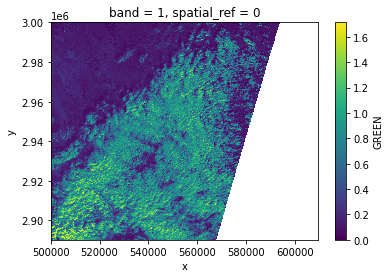

In [6]:
# Plot a subsampled version
green[:, ::10, ::10].plot()

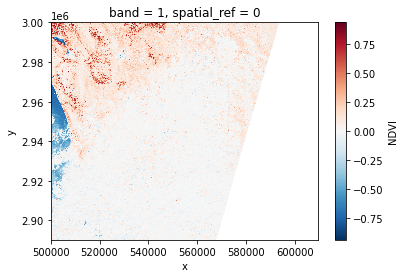

In [7]:
# Plot a subsampled version
ndvi[:, ::10, ::10].plot()

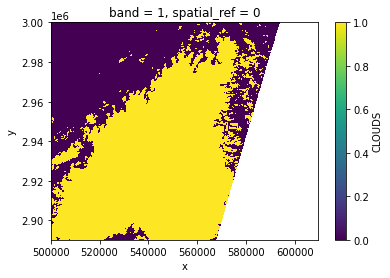

In [8]:
# Plot a subsampled version
clouds[:, ::10, ::10].plot()